# Part 1 of the Machine Learning Project

## Preliminaries


Before starting familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

In [5]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [6]:
#The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past

# 1 - Loading the different datasets.
app_train = pd.read_csv('data/application_train.csv.zip', compression = 'zip')
app_test = pd.read_csv('data/application_test.csv.zip', compression = 'zip')
bureau = pd.read_csv('data/bureau.csv.zip', compression = 'zip')
app_past = pd.read_csv('data/previous_application.csv')


# 2 - The number of rows and columns for each
print('Training data shape (rows, columns):', app_train.shape)
print('Test data shape:', app_test.shape)
print('Bureau data shape:', bureau.shape)
print('Past Applications data shape:', app_past.shape)


Training data shape (rows, columns): (307511, 122)
Test data shape: (48744, 121)
Bureau data shape: (1716428, 17)
Past Applications data shape: (1670214, 37)


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

In [7]:
# 3

## a
total_app_test = app_test.isnull().sum().sort_values(ascending=False)
percent_app_test = (((app_test.isnull().sum())/len(app_test))*100).sort_values(ascending=False)
missing_app_test_data = pd.concat([total_app_test, percent_app_test], axis=1, keys=['Total', 'Percent'])
print('Columns with the most missing values in app_test: ')
missing_app_test_data.head(20)

Columns with the most missing values in app_test: 


,Total,Percent
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


In [8]:
## b
total_bureau = bureau.isnull().sum().sort_values(ascending=False)
percent_bureau = (((bureau.isnull().sum())/len(bureau))*100).sort_values(ascending=False)
missing_bureau_data = pd.concat([total_bureau, percent_bureau], axis=1, keys=['Total', 'Percent'])
print('Columns with the most missing values in bureau: ')
missing_bureau_data.head(17) #there are only 17 columns in the entire bureau dataset

Columns with the most missing values in bureau: 


,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


In [9]:
## c 
total_app_past = app_past.isnull().sum().sort_values(ascending=False)
percent_app_past = (((app_past.isnull().sum())/len(app_past))*100).sort_values(ascending=False)
missing_app_past_data = pd.concat([total_app_past, percent_app_past], axis=1, keys=['Total', 'Percent'])
print('Columns with the most missing values in app_past: ')
missing_app_past_data.head(20)

Columns with the most missing values in app_past: 


,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [10]:
# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).

# First, we create a new data frame to store the original copy of app_test
app_test_original = app_test.copy()

# We also separate columns with numerical data from columns with categorical data
numerical_cols = app_test.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = app_test.select_dtypes(include=['object']).columns

# We choose to impute numerical missing values with the median of all values from said column
app_test[numerical_cols] = app_test[numerical_cols].fillna(app_test[numerical_cols].median())

# For categorical missing values, we use categorization, and create a 'Missing'category
app_test[categorical_cols] = app_test[categorical_cols].fillna('Missing')

# As a final step, we make sure that all the missing values were taken care of, by summing the total number of missing values left in cleaned data frame
print('Number of missing values left in the app_test data set: ', app_test.isnull().sum().sum())

Number of missing values left in the app_test data set:  0


**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)



## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

TARGET
0    282686
1     24825
Name: count, dtype: int64

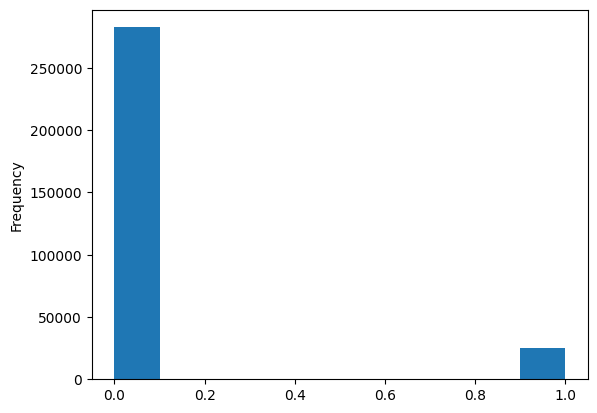

In [11]:
# 5 - value counts
display(app_train['TARGET'].value_counts())

# 5 - histograms
app_train['TARGET'].plot.hist()

# We compute the ratio between the two classes
class_ratio = (app_train['TARGET'] == 0).sum() // (app_train['TARGET'] == 1).sum()

**5**: Describe briefly your observation (double click to edit a text cell)

In [12]:
print(f'We notice a very clear class imbalance. There are {class_ratio} times more objects classified as 0 than 1 in our training set.')

We notice a very clear class imbalance. There are 11 times more objects classified as 0 than 1 in our training set.


Classes counts after oversampling:
 TARGET
0    282686
1    282686
Name: count, dtype: int64
Classes counts after oversampling with SMOTE:
 TARGET
0    282686
1    282686
Name: count, dtype: int64


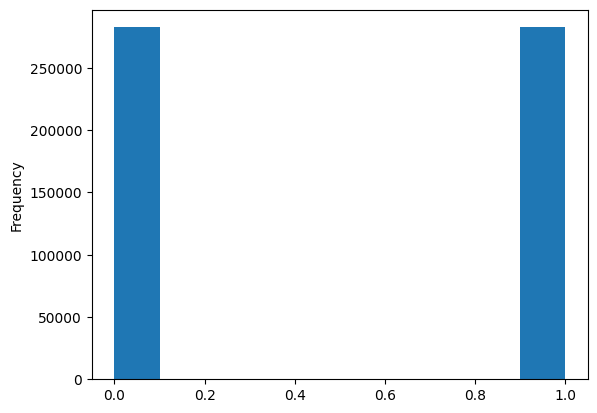

In [14]:
# copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify
# this is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/

app_train_original = app_train.copy()

# 6.a - fix imbalance with undersampling or oversampling
# Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.

# The class ratio being so large (11 times more 0 values than 1 values), we would loose too much data by using
# undersampling, thus we will implement oversampling.

class_0, class_1 = app_train_original['TARGET'].value_counts()
c0 = app_train[app_train['TARGET'] == 0]
c1 = app_train[app_train['TARGET'] == 1]
app_train_2 = c1.sample(class_1)

app_train_1_over = c1.sample(class_0, replace=True)
app_train = pd.concat([c0, app_train_1_over], axis=0)

# Let us make sure that the classes are balanced now
print(f'Classes counts after oversampling:\n', app_train['TARGET'].value_counts())

app_train['TARGET'].plot.hist()

 
# 6.b - fix balance with SMOTE on your previously copied dataframe
# You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html
# Make sure to select the appropriate SMOTE variant.

from imblearn.over_sampling import SMOTE

# Since SMOTE cannot deal with NaN values, we first need to take care of missing values. We choose to implement the exact same solution as in Question 4.

# We first separate columns with numerical data from columns with categorical data
numerical_cols = app_train_original.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = app_train_original.select_dtypes(include=['object']).columns

# We choose to impute numerical missing values with the median of all values from said column
app_train_original[numerical_cols] = app_train_original[numerical_cols].fillna(app_train_original[numerical_cols].median())

# For categorical missing values, we use categorization, and create a 'Missing'category
app_train_original[categorical_cols] = app_train_original[categorical_cols].fillna('Missing')

# Now that the missing values are taken care of, we separate our features (X) from our target (y)
X = app_train_original.drop(columns=['TARGET'])
y = app_train_original['TARGET']

# We also need to encode categorical variables, using one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

smote = SMOTE(random_state=42)

# We can now fit and resample the dataset
X_smote, y_smote = smote.fit_resample(X_encoded, y)

# We then convert the result back into a DataFrame
app_train_smote = pd.DataFrame(X_smote, columns=X_encoded.columns)
app_train_smote['TARGET'] = y_smote

# Finally, let us make sure that the classes are now balanced
print(f'Classes counts after oversampling with SMOTE:\n', app_train_smote['TARGET'].value_counts())

# We will use the dataframe app_train from 6.a in the following

<h2>Categorical features (9pts)</h2>

In `app_test`

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?


8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

In [15]:
# 7a

# Let us first have a look at the categories encoded in the 'NAME_HOUSING_TYPE' column
print(app_test['NAME_HOUSING_TYPE'].unique())

['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [16]:
# We choose to use one-hot encoding for this column as there aren't many different categories encoded, which won't affect the dimension of our data frame too much.
# It is also the encoding that makes the most sense to us, as label encoding would not allow use to capture the distinctiveness of the features encoded.
app_test = pd.get_dummies(app_test, columns=['NAME_HOUSING_TYPE'], dtype= 'int64')
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,3.0,0,1,0,0,0,0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,1.0,4.0,0,1,0,0,0,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,3.0,0,1,0,0,0,0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,2.0,0,1,0,0,0,0


In [17]:
# Since there are only two genders encoded in the 'CODE_GENDER' column (F and M), we use binary encoding. We transform all the 'F's in 0, and 'M's in 1.
app_test['CODE_GENDER'] = app_test['CODE_GENDER'].map({'F': 0, 'M': 1})
app_test['CODE_GENDER'].head()

0    0
1    1
2    1
3    0
4    1
Name: CODE_GENDER, dtype: int64

In [18]:
# 7b

# In order to only have 3 categories of Housing Types, we look at the one-hot encoded columns and count the number of values in each one of them.
# We will then select the 3 categories with the most values.
housing_type_columns = [col for col in app_test.columns if 'NAME_HOUSING_TYPE_' in col]
housing_type_counts = app_test[housing_type_columns].sum()

top3_housing_types = housing_type_counts.nlargest(3).index
print(top3_housing_types)

# Now that we have selected the 3 most recurring categories, let us merge all the others into a new category ('Other')
app_test['NAME_HOUSING_TYPE_Other'] = app_test[housing_type_columns].drop(columns=top3_housing_types).sum(axis=1)

# We then get rid of all the columns that were not in the top 3 most recurring categories
housing_types_to_drop = [col for col in housing_type_columns if col not in top3_housing_types]
app_test = app_test.drop(columns=housing_types_to_drop)

app_test.head()

Index(['NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_HOUSING_TYPE_Municipal apartment'],
      dtype='object')


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Other
0,100001,Cash loans,0,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,100005,Cash loans,1,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1,0,0,0
2,100013,Cash loans,1,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,1.0,4.0,1,0,0,0
3,100028,Cash loans,0,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1,0,0,0
4,100038,Cash loans,1,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,0


In [19]:
# Let us now have a look at the categories encoded in the 'NAME_HOUSING_TYPE' column
print(app_test['FLAG_OWN_CAR'].unique())

['N' 'Y']


In [20]:
# Since there are only two categories, we will use LabelEncoder to transform all the 'N's in '0' and 'Y's in '1'.
from sklearn.preprocessing import LabelEncoder

# We initialize the label encoder
label_encoder = LabelEncoder()

# We now apply Label Encoding for FLAG_OWN_CAR
app_test['FLAG_OWN_CAR'] = label_encoder.fit_transform(app_test['FLAG_OWN_CAR'])

app_test[['FLAG_OWN_CAR']].head()

,FLAG_OWN_CAR
0,0
1,0
2,1
3,0
4,1


In [21]:
# 7c 

# We first compute the percentage of ocurrences of each category in the 'ORGANIZATION_TYPE' column
organization_type_counts = app_test['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

# We then identify the categories that appear in more than 10% of the dataset
top_organization_types = organization_type_counts[organization_type_counts > 10].index

# We now group the other categories into a new one, called 'Other'
app_test['ORGANIZATION_TYPE'] = app_test['ORGANIZATION_TYPE'].apply(lambda x: x if x in top_organization_types else 'Other')

# We then get the dummies for this reduced categories and compute the size of the dummy vectors created
app_test_dummies_organization = pd.get_dummies(app_test, columns=['ORGANIZATION_TYPE'], dtype= 'int64')
organization_dummy_vector_size = app_test_dummies_organization.filter(like='ORGANIZATION_TYPE').shape[1]
print(f"Size of the dummy vector for ORGANIZATION_TYPE: {organization_dummy_vector_size}")


Size of the dummy vector for ORGANIZATION_TYPE: 4


In [22]:
# 8

# We first identify the remaining categorical columns in the app_test dataframe
cat_col_app_test = app_test.select_dtypes(include=['object']).columns

# We then apply one-hot encoding to these columns
app_test = pd.get_dummies(app_test, columns=cat_col_app_test, dtype= 'int64')

app_test

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,WALLSMATERIAL_MODE_Missing,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,...,0,0,0,0,0,1,0,0,1,0
1,100005,1,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,...,1,0,0,0,0,0,0,1,0,0
2,100013,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,...,1,0,0,0,0,0,0,1,0,0
3,100028,0,0,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,...,0,0,0,0,1,0,0,0,1,0
4,100038,1,1,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,...,1,0,0,0,0,0,0,1,0,0
48740,456222,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,...,1,0,0,0,0,0,0,1,0,0
48741,456223,0,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,...,0,0,0,0,0,1,0,0,1,0
48742,456224,1,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,...,0,0,0,0,1,0,0,0,1,0


In [23]:
# We now apply the same steps to the app_past dataframe
cat_col_app_past = app_past.select_dtypes(include=['object']).columns
app_past = pd.get_dummies(app_past, columns=cat_col_app_past, dtype= 'int64')

app_past

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,...,1,0,0,0,0,0,0,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,...,0,1,0,0,0,0,0,0,0,0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,14704.290,267295.5,311400.0,0.0,267295.5,12,1,0.000000,...,0,0,0,0,1,0,0,0,0,0
1670210,2357031,334635,6622.020,87750.0,64291.5,29250.0,87750.0,15,1,0.340554,...,0,0,0,0,1,0,0,0,0,0
1670211,2659632,249544,11520.855,105237.0,102523.5,10525.5,105237.0,12,1,0.101401,...,0,0,1,0,0,0,0,0,0,0
1670212,2785582,400317,18821.520,180000.0,191880.0,NaN,180000.0,9,1,NaN,...,1,0,0,0,0,0,0,0,0,0


In [24]:
# We now apply the same steps to the bureau dataframe
cat_col_bureau = bureau.select_dtypes(include=['object']).columns
bureau = pd.get_dummies(bureau, columns=cat_col_bureau, dtype= 'int64')

bureau

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.50,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.00,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,...,0,0,0,0,0,1,0,0,0,0
1716424,100044,5057754,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,...,0,0,0,0,0,0,0,0,0,0
1716425,100044,5057762,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,...,0,0,0,0,0,0,0,0,0,0
1716426,246829,5057770,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,...,0,0,0,0,0,0,0,0,0,0


<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [25]:
# 9a

# We first look at the summary statistics of the feature 'DEF_30_CNT_SOCIAL_CIRCLE'
app_test['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    48744.000000
mean         0.143566
std          0.514272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

We can see that at least 75% of the values are equal to 0. We can also see that the maximum value is 34.00. This value might be an outlier

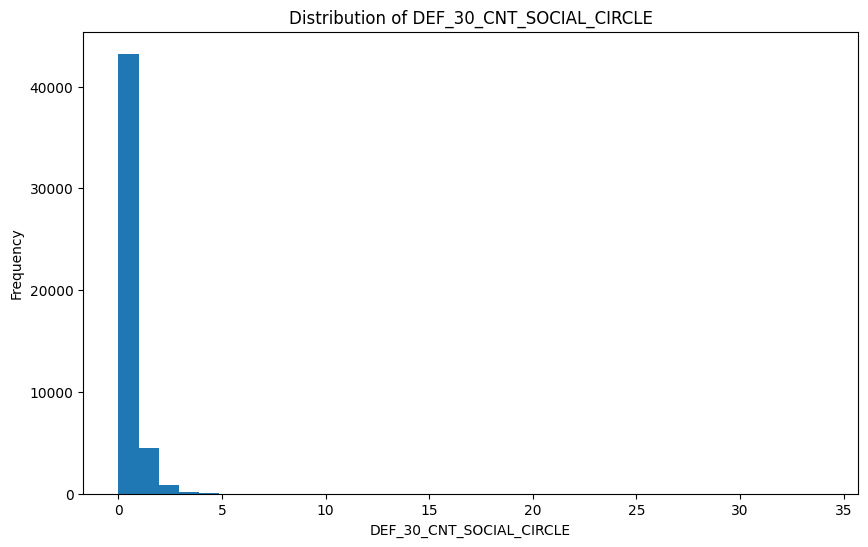

In [26]:
# We thus plot the distribution of values in the 'DEF_30_CNT_SOCIAL_CIRCLE' column
plt.figure(figsize=(10, 6))
plt.hist(app_test['DEF_30_CNT_SOCIAL_CIRCLE'], bins=35)
plt.title('Distribution of DEF_30_CNT_SOCIAL_CIRCLE')
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE')
plt.ylabel('Frequency')
plt.show()


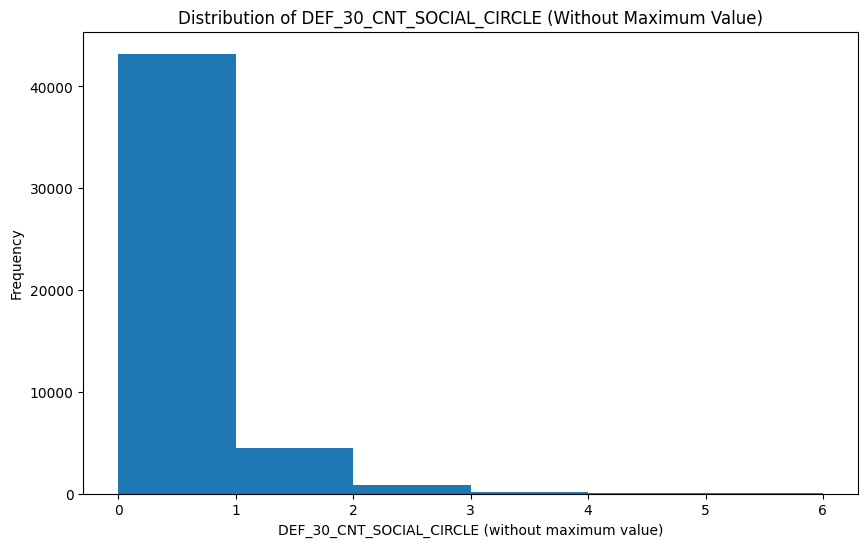

In [27]:
# There dooesn't seem to be any values besides the maximum after 5, so let us see if removing the maximum value removes the anomaly
max_value_30_cnt = app_test['DEF_30_CNT_SOCIAL_CIRCLE'].max()
without_max_30_cnt = app_test[app_test['DEF_30_CNT_SOCIAL_CIRCLE'] != max_value_30_cnt]

# We now plot the distribution of the data once the maximum value removed
plt.figure(figsize=(10, 6))
plt.hist(without_max_30_cnt['DEF_30_CNT_SOCIAL_CIRCLE'], bins=6)
plt.title('Distribution of DEF_30_CNT_SOCIAL_CIRCLE (Without Maximum Value)')
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE (without maximum value)')
plt.ylabel('Frequency')
plt.show()


In [28]:
without_max_30_cnt['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    48741.000000
mean         0.141483
std          0.440379
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

It indeed seems like removing the max value of 'DEF_30_CNT_SOCIAL_CIRCLE' takes care of the anomaly

In [29]:
# 9b

# # We now look at the summary statistics of the feature 'LANDAREA_AVG'
app_test['LANDAREA_AVG'].describe()

count    48744.000000
mean         0.056241
std          0.053918
min          0.000000
25%          0.048300
50%          0.048300
75%          0.048300
max          1.000000
Name: LANDAREA_AVG, dtype: float64

We notice that 25%, but also 75% of the entries have a value under 0.483. There seems to be an overwhelming amount of entries equal to 0.483, leading to an imbalance in our data.

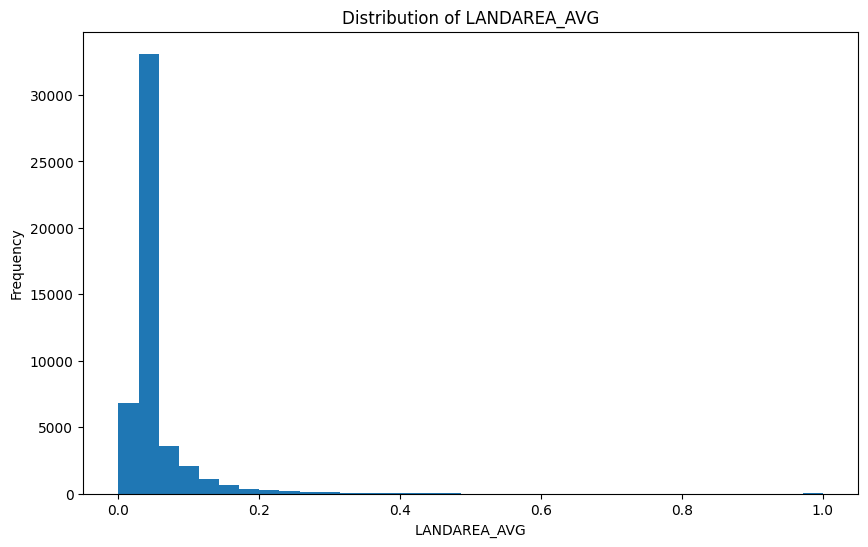

In [30]:
# We plot the distribution of values in 'LANDAREA_AVG'
plt.figure(figsize=(10, 6))
plt.hist(app_test['LANDAREA_AVG'], bins=35)
plt.title('Distribution of LANDAREA_AVG')
plt.xlabel('LANDAREA_AVG')
plt.ylabel('Frequency')
plt.show()

Even if the summary statistics were leading us to believe there was an anomaly in this column, we are inclined to say that the distribution of the data is probably simply heavily skewed towards this median value of 0.483, and that it is probably best to leave this column as is, as to not alter our preidctive power.

In [31]:
# 9c

# We now look at the summary statistics of the feature 'AMT_INCOME_TOTAL'
app_test['AMT_INCOME_TOTAL'].describe()

count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

We can see that the maximum value in 'AMT_INCOME_TOTAL' is 10^2 times bigger than the minimum value, while 75% of the values are at least 10 times smaller than the maximum value. We can hypothesize the maximum value being an outlier among other values.

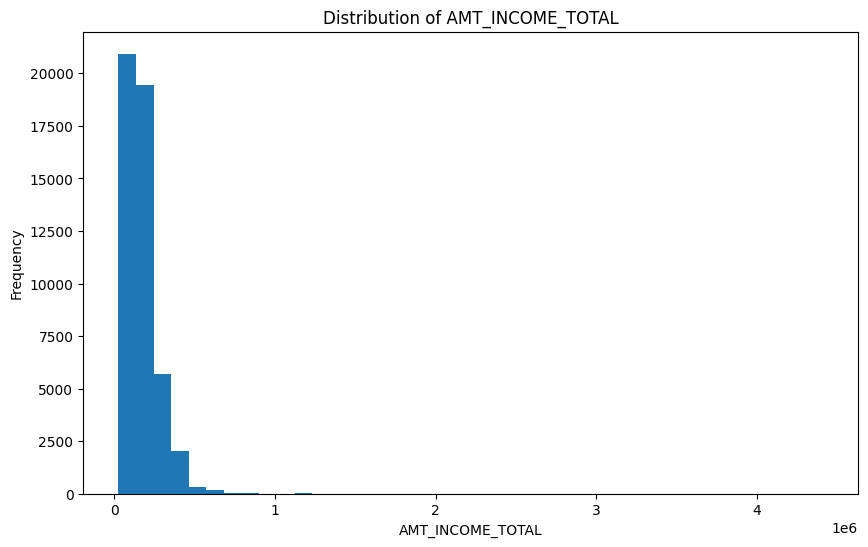

In [32]:
# We plot the distribution of values in 'AMT_INCOME_TOTAL'
plt.figure(figsize=(10, 6))
plt.hist(app_test['AMT_INCOME_TOTAL'], bins=40)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

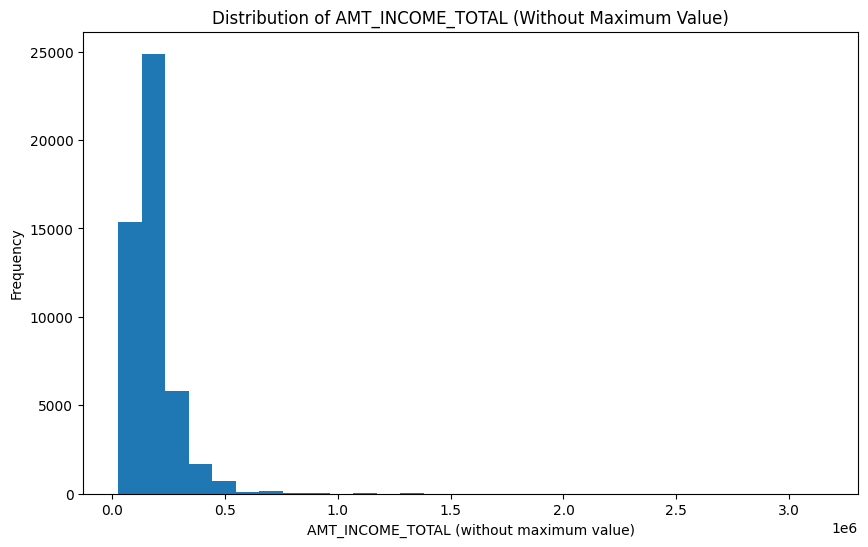

In [33]:
# Let us see if removing the maximum value removes the anomaly
max_value_amt_tot = app_test['AMT_INCOME_TOTAL'].max()
without_max_amt_tot = app_test[app_test['AMT_INCOME_TOTAL'] != max_value_amt_tot]

# We now plot the distribution of the data once the maximum value removed
plt.figure(figsize=(10, 6))
plt.hist(without_max_amt_tot['AMT_INCOME_TOTAL'], bins=30)
plt.title('Distribution of AMT_INCOME_TOTAL (Without Maximum Value)')
plt.xlabel('AMT_INCOME_TOTAL (without maximum value)')
plt.ylabel('Frequency')
plt.show()


It looks like this wasn't enough to get rid of the anomaly in this column. We thus consider getting rid of the highest percentile altogether.

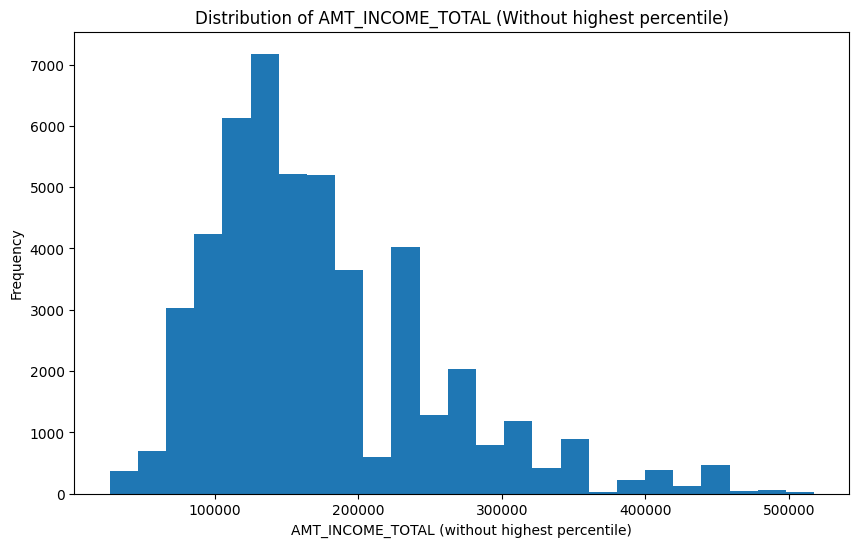

In [34]:
# We compute the 99th percentile of the AMT_INCOME_TOTAL column
perc_99_amt_tot = app_test['AMT_INCOME_TOTAL'].quantile(0.99)

# We then filter out values above the 99th percentile
without_99_perc_amt_tot = app_test[app_test['AMT_INCOME_TOTAL'] <= perc_99_amt_tot]

# Let us have a look at the distribution of the data once the values above the 99th percentile removed
plt.figure(figsize=(10, 6))
plt.hist(without_99_perc_amt_tot['AMT_INCOME_TOTAL'], bins=25)
plt.title('Distribution of AMT_INCOME_TOTAL (Without highest percentile)')
plt.xlabel('AMT_INCOME_TOTAL (without highest percentile)')
plt.ylabel('Frequency')
plt.show()

This looks much less abnormal than the initial distribution of the 'AMT_INCOME_TOTAL', and we do believe that the anomaly of this column was efficiently curated.

In [35]:
# 10

# Finally, we have a look at the summary statistics of the feature 'DAYS_EMPLOYED'
app_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Here, we can see that the maximum value is a very high positive number, while at least 75% of the values are negative, and the mean is positive. This leads us to think that the maximum value is an abnormal value outweighting the others.

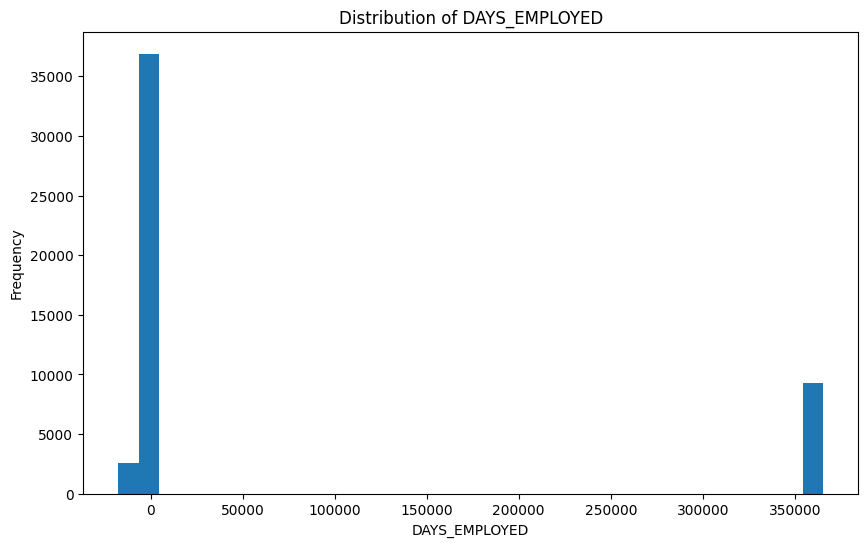

In [36]:
# We plot the distribution of values in 'DAYS_EMPLOYED'
plt.figure(figsize=(10, 6))
plt.hist(app_test['DAYS_EMPLOYED'], bins=35)
plt.title('Distribution of DAYS_EMPLOYED')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Frequency')
plt.show()

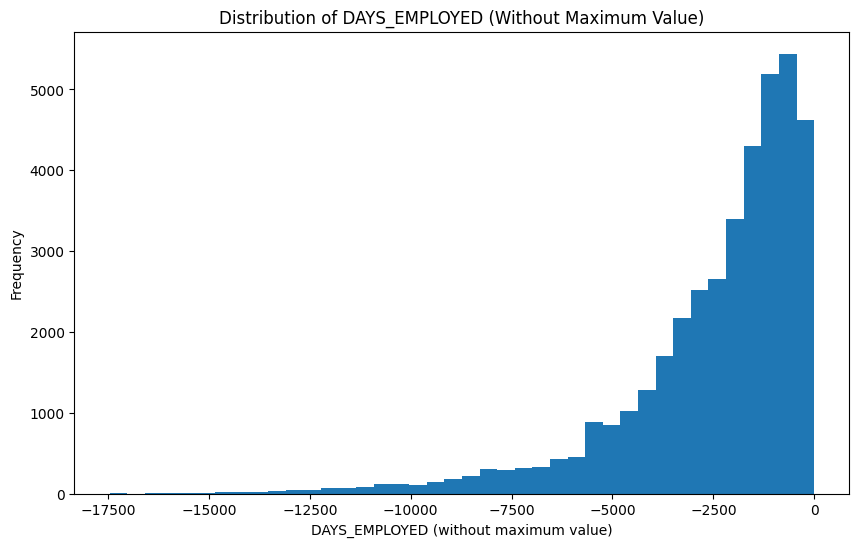

In [37]:
# We now remove the maximum value in order to take care of the anomaly
max_value_days_employed = app_test['DAYS_EMPLOYED'].max()
app_test = app_test[app_test['DAYS_EMPLOYED'] != max_value_days_employed]

# We plot the distribution of the data once the maximum value removed
plt.figure(figsize=(10, 6))
plt.hist(app_test['DAYS_EMPLOYED'], bins=40)
plt.title('Distribution of DAYS_EMPLOYED (Without Maximum Value)')
plt.xlabel('DAYS_EMPLOYED (without maximum value)')
plt.ylabel('Frequency')
plt.show()


We can see that the distribution of the values in the 'DAYS_EMPLOYED' columns doesn't look abnormal anymore.

<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [38]:
# 11

correlations = app_test.corr()

# We set a threshold for very strong correlation (collinearity). We choose 0.7 as a threshold, since we do believe that any correlation coefficient above this value 
# would affect the quality of our prediction, as shown in the following paper:
# Dormann, C. F., J. Elith, S. Bacher, et al. 2013. Collinearity: a review of methods to deal with it and a simulation study evaluating their performance.
threshold = 0.7

# We now look at all the possible pair of columns within the data set
correlation_pairs = correlations.abs().unstack().sort_values(ascending=False)

# And now we find all the pairs of columns with a correlation coefficient above the set threshold. We obviously do not take into account the columns paired with
# themselves, since in this case Pearson correlation is then necessarily equal to 1.
collinear_pairs = correlation_pairs[(correlation_pairs > threshold) & (correlation_pairs < 1)].drop_duplicates()

# We then drop the collinear features
to_drop = set()
for (feature1, feature2) in collinear_pairs.index:
    # In order to make sure that we keep only one feature from each collinear pair, we only add the second feature to the dropped set of columns
    if feature2 not in to_drop:
        to_drop.add(feature2)

app_test = app_test.drop(columns=to_drop)

print(f"Removed columns: {to_drop}")
print(f"New shape of 'app_test': {app_test.shape}")

Removed columns: {'LIVE_CITY_NOT_WORK_CITY', 'HOUSETYPE_MODE_block of flats', 'NAME_INCOME_TYPE_Working', 'LIVINGAREA_MODE', 'BASEMENTAREA_AVG', 'ELEVATORS_MEDI', 'FLAG_DOCUMENT_8', 'NONLIVINGAPARTMENTS_MEDI', 'APARTMENTS_AVG', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLOORSMAX_MODE', 'ENTRANCES_MODE', 'ELEVATORS_MODE', 'LIVINGAREA_MEDI', 'LANDAREA_AVG', 'ELEVATORS_AVG', 'FONDKAPREMONT_MODE_reg oper account', 'AMT_CREDIT', 'FLOORSMAX_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'NAME_TYPE_SUITE_Family', 'YEARS_BUILD_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'AMT_ANNUITY', 'NONLIVINGAREA_AVG', 'NAME_CONTRACT_TYPE_Cash loans', 'YEARS_BEGINEXPLUATATION_AVG', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'HOUSETYPE_MODE_Missing', 'REGION_RATING_CLIENT_W_CITY', 'FLOORSMAX_MEDI', 'REG_REGION_NOT_WORK_REGION', 'CNT_CHILDREN', 'EMERGENCYSTATE_MODE_Missing', 'LIVINGAPARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'BASEMENTAREA_MEDI', 'ENTRANCES_A

In [39]:
# 12

# We choose to proceed as in Question 11, meaning that we study the correlation of the features in the bureau dataset, and remove the collinear features.
# We will then add the remaining features to the training dataset.
correlations_b = bureau.corr()

# We set a threshold for very strong correlation (collinearity). We choose 0.7 as a threshold, since we do believe that any correlation coefficient above this value 
# would affect the quality of our prediction, as shown in the following paper:
# Dormann, C. F., J. Elith, S. Bacher, et al. 2013. Collinearity: a review of methods to deal with it and a simulation study evaluating their performance.
threshold = 0.7

# We now look at all the possible pair of columns within the data set
correlation_pairs_b = correlations_b.abs().unstack().sort_values(ascending=False)

# And now we find all the pairs of columns with a correlation coefficient above the set threshold. We obviously do not take into account the columns paired with
# themselves, since in this case Pearson correlation is then necessarily equal to 1.
collinear_pairs_b = correlation_pairs_b[(correlation_pairs_b > threshold) & (correlation_pairs_b < 1)].drop_duplicates()

# We then drop the collinear features
to_drop = set()
for (feature1, feature2) in collinear_pairs_b.index:
    # In order to make sure that we keep only one feature from each collinear pair, we only add the second feature to the dropped set of columns
    if feature2 not in to_drop:
        to_drop.add(feature2)

bureau = bureau.drop(columns=to_drop)

print(f"Removed columns: {to_drop}")
print(f"New shape of 'app_test': {bureau.shape}")


Removed columns: {'CREDIT_TYPE_Consumer credit', 'DAYS_CREDIT_UPDATE', 'CREDIT_CURRENCY_currency 1', 'DAYS_CREDIT', 'CREDIT_ACTIVE_Closed'}
New shape of 'app_test': (1716428, 32)


In [40]:
# Before applying a Random Forest to our training data, we need to make sure all the columns are correctly encoded. We use one-hot encoding to handle categorical data.
cat_col_app_train = app_train.select_dtypes(include=['object']).columns
app_train = pd.get_dummies(app_train, columns=cat_col_app_train, dtype= 'int64')

In [41]:
# We them merge the two datasets on 'SK_ID_CURR'
app_train_with_bureau = app_train.merge(bureau, how='left', on='SK_ID_CURR')


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Define features (X) and target (y)
X = app_train_with_bureau.drop(columns=['TARGET'])
y = app_train_with_bureau['TARGET']

# We split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


KeyboardInterrupt: 

It is important to note that this cell seem to be running for an extremely long amount of time without actually stopping, which leads us to think that there is something wrong with our database, espcially regarding its size.

In [38]:
# We then rain a Random Forest model
random_forest = RandomForestClassifier(n_estimators = 10, random_state = 42, n_jobs = -1)
random_forest.fit(X_train, y_train)



KeyboardInterrupt: 

In [ ]:
# We finally evaluate the performance of the model
y_pred = random_forest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")

##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [37]:
## Your code here

**13**: Answer the question here (double click to edit a text cell)

